In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc, classification_report
from sklearn.pipeline import Pipeline
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.metrics import ConfusionMatrixDisplay

style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# 1. Descriptive Statistics

Gunakan function info dan describe pada dataset final project kalian. Tuliskan hasil observasinya, seperti:
1. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?
2. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
3. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq) 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


**Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?**

Semua tipe data sudah sesuai

**Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?**

Tidak ada kolom yang memiliki nilai kosong

In [5]:
# describe numerical
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10999.0,5500.000000,3175.282140,1.0,2750.5,5500.0,8249.5,10999.0
Customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0
Reached.on.Time_Y.N,10999.0,0.596691,0.490584,0.0,0.0,1.0,1.0,1.0


In [6]:
# describe categorical
df.describe(include='O').T

,count,unique,top,freq
Warehouse_block,10999,5,F,3666
Mode_of_Shipment,10999,3,Ship,7462
Product_importance,10999,3,low,5297
Gender,10999,2,F,5545


**Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)**

1. Customer rating terlihat distribusinya simetris, mean ~ median
2. Prior purchase terlihat agak skewed ke kanan, mean > median
3. Discount offered terlihat skewed ke kanan, mean > median
4. Weight terlihat skewed ke kiri, mean < median

# 2. Univariate Analysis

Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.

In [7]:
num_col = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
cat_col = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
target = df['Reached.on.Time_Y.N']

## Numerical Univariate Analysis

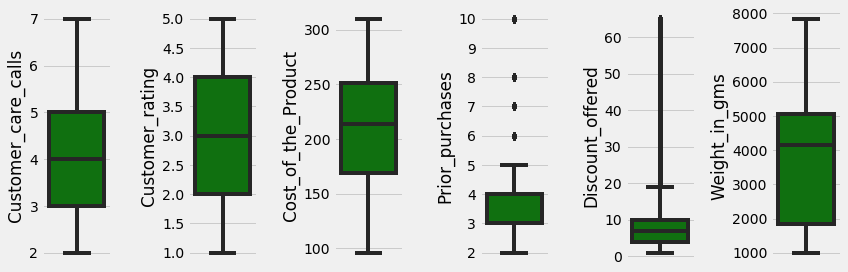

In [8]:
fig = plt.figure(figsize = (12,4))
for i in range(0, len(num_col)):
    plt.subplot(1, len(num_col), i+1)
    sns.boxplot(y=df[num_col[i]], color = 'green', orient = 'v')
    plt.tight_layout()

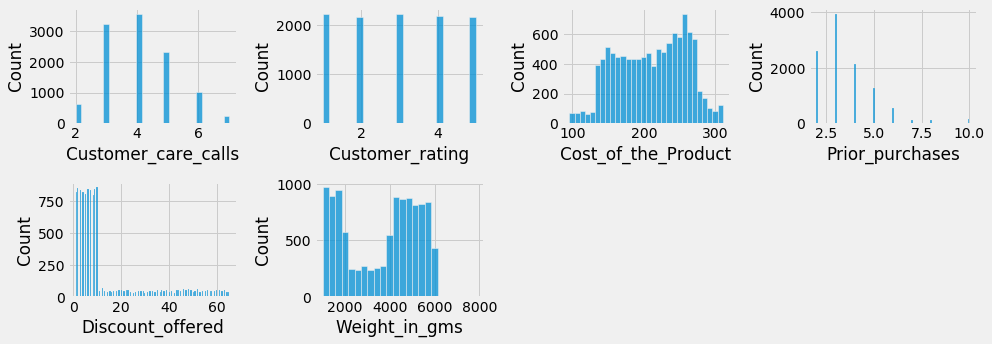

In [9]:
fig = plt.figure(figsize = (14,5))
for i in range(0, len(num_col)):
    plt.subplot(2, 4, i+1)
    sns.histplot(x = df[num_col[i]])
    plt.tight_layout()

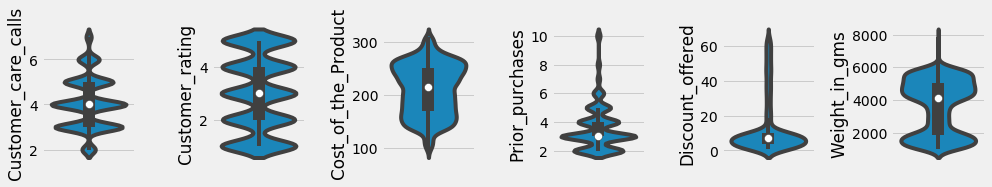

In [10]:
fig = plt.figure(figsize = (14,5))
for i in range(0, len(num_col)):
    plt.subplot(2, len(num_col), i+1)
    sns.violinplot(data = df, y = num_col[i])
    plt.tight_layout()

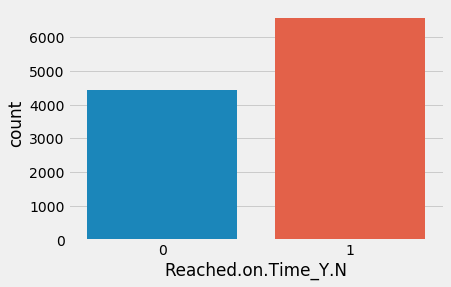

In [11]:
sns.countplot(x = target)

Conclusion:
1. Outlier terdapat di variabel "prior_purchases" dan "discount_offered"
2. Customer_rating memiliki distribusi uniform
3. Prior_purchases & discount_offered memiliki distribusi positively skewed
4. Weight_in_gms memiliki distribusi bimodal
5. Terdapat perbedaan scale
6. Terdapat imbalance dalam variabel target (reached on time) tetapi tidak terlalu besar

Saran untuk data preprocessing:
1. Melakukan normalisasi
2. Untuk feature cost_of_the_product dan discount_offered, coba digabungkan, buat feature baru "gross_revenue" dimana gross revenue = cost * (1-disc/100)

## Categorical Univariate Analysis

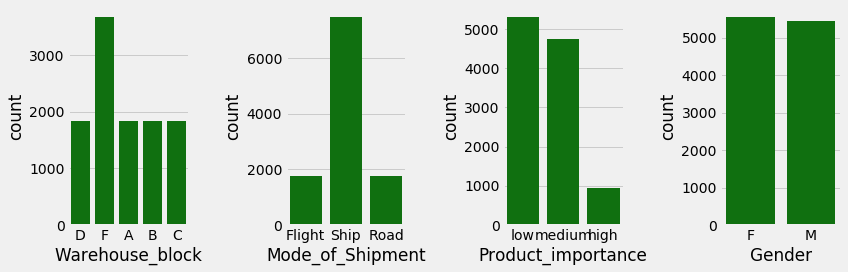

In [12]:
fig = plt.figure(figsize = (12,4))
for i in range(0, len(cat_col)):
    plt.subplot(1, len(cat_col), i+1)
    sns.countplot(x=df[cat_col[i]], color = 'green')
    plt.tight_layout()

Conclusion:
1. Warehouse block F terlihat besar sendiri
2. Mode of shipment kapal terlihat besar sendiri
3. Product importance high terlihat kecil sendiri

# 3. Multivariate Analysis

In [13]:
df['On_time?'] = df['Reached.on.Time_Y.N'].apply(lambda x: 'Yes' if x == 0 else 'No')

## Numerical Multivariate Analysis

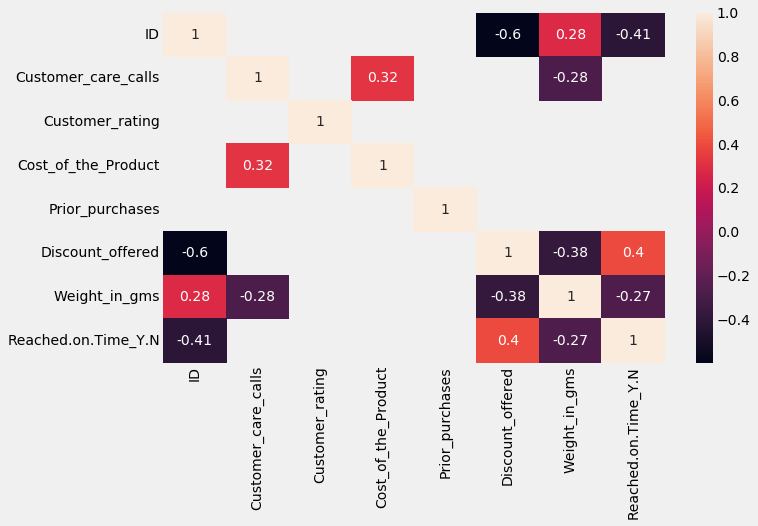

In [14]:
var_corr = df.corr()
fig = plt.figure(figsize = (10,6))
sns.heatmap(var_corr, annot=True, mask = (abs(var_corr) <= 0.2))

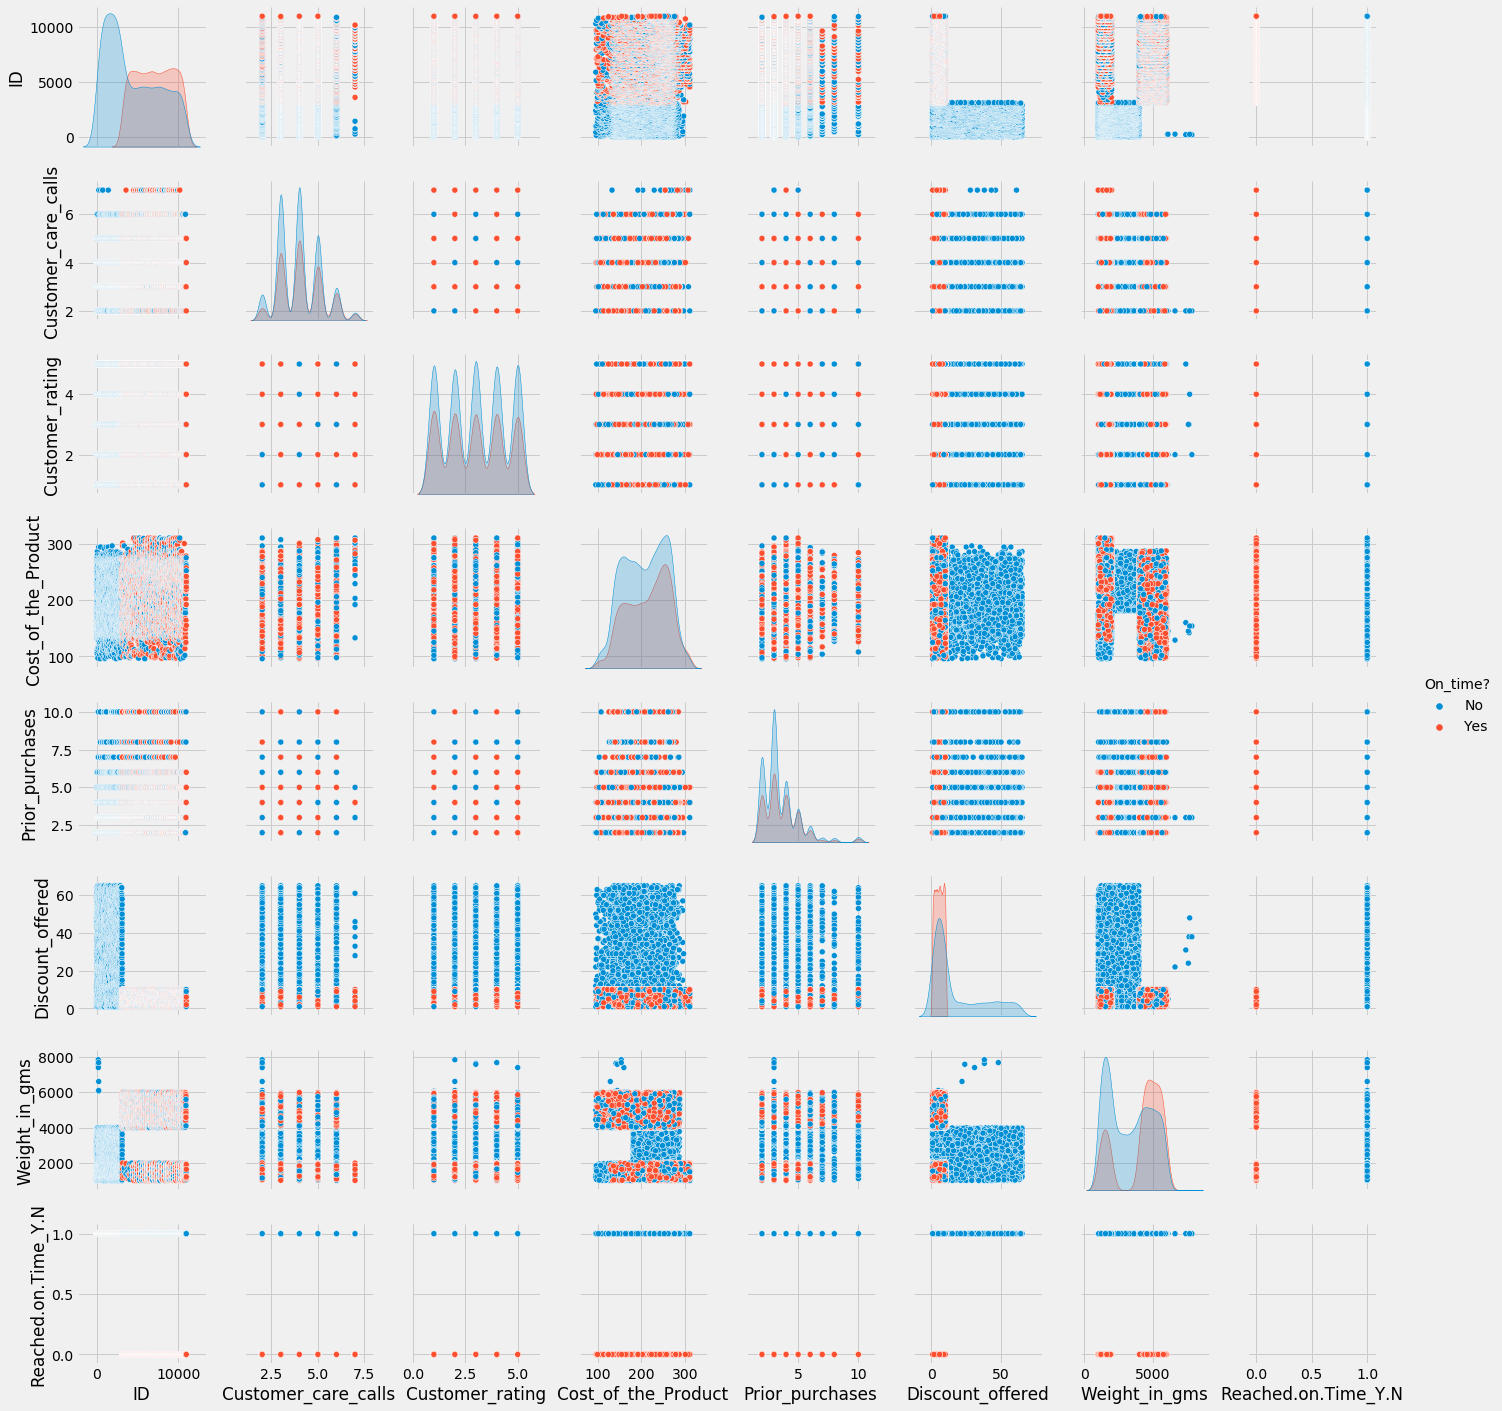

In [15]:
sns.pairplot(df, hue = 'On_time?', diag_kind = 'kde')

In [16]:
# since f_class_if does not accept missing values, we will do a very crude imputation of missing values
# Calculate F Statistic and corresponding p values
F_statistic, p_values = f_classif(df[num_col], target)
# convert to a DF
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': num_col, 'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})
ANOVA_F_table.merge(df[num_col].describe().T.reset_index(), left_on = 'Numerical_Feature', right_on = 'index').sort_values(['F-Score', 'count'], ascending=False)

,Numerical_Feature,F-Score,p values,index,count,mean,std,min,25%,50%,75%,max
4,Discount_offered,2058.842985,0.000000e+00,Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
5,Weight_in_gms,856.401798,0.000000e+00,Weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0
2,Cost_of_the_Product,59.873829,0.000000e+00,Cost_of_the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
0,Customer_care_calls,49.775450,0.000000e+00,Customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
3,Prior_purchases,33.996610,5.700000e-09,Prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
1,Customer_rating,1.892885,1.689049e-01,Customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0


**Berdasarkan Korelasi & F-Score:**
1. Belum terdapat variabel dengan korelasi yang kuat terhadap target

Berdasarkan Pairplot:
1. Semua ID di bawah 3136 terlambat
2. Discount di atas 10% semua terlambat
    * ID > 3136 diskon max 10%
3. Weight di antara 2000 - 4000 dan di atas 6000 semua terlambat
    * ID < 3136 weight max 4000 gms
    * ID > 3136 tidak ada weight di antara 2000 - 4000 dan di atas 6000 gms
    * Weight di antara 2000 - 4000 cost product min 181, max 286
4. Terdapat perlebaran gaps "reached on time" pada data "cost_of_the_product" di antara 100 - 200

**Saran untuk data preprocessing:**
1. Potential untuk terjadi underfitting
2. Perlu melakukan feature engineering untuk menambah kompleksitas model

## Categorical Multivariate Analysis

In [17]:
# define an empty dictionary to store chi-squared test results
chi2_check = {}

# loop over each column in the training set to calculate chi-statistic with the target variable
for column in cat_col:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(target, df[column]))
    chi2_check.setdefault('Feature',[]).append(column)
    chi2_check.setdefault('p-value',[]).append(round(p, 10))

# convert the dictionary to a DF
chi2_result = pd.DataFrame(data = chi2_check)
# chi2_result.sort_values(by = ['p-value'], ascending = True, ignore_index = True, inplace = True)
chi2_result.merge(df[cat_col].describe().T.reset_index(), left_on ='Feature', right_on = 'index').sort_values(by = ['p-value', 'unique'])

,Feature,p-value,index,count,unique,top,freq
2,Product_importance,0.002230,Product_importance,10999,3,low,5297
3,Gender,0.636703,Gender,10999,2,F,5545
1,Mode_of_Shipment,0.689549,Mode_of_Shipment,10999,3,Ship,7462
0,Warehouse_block,0.895952,Warehouse_block,10999,5,F,3666


In [18]:
def rasio_plot(data, col):
    df = data.copy()
    g = df.groupby(col)['On_time?'].value_counts(normalize=True).unstack('On_time?').plot(kind='barh', stacked=True)
    g.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    #g.set_ylabel('Partner Dependants Group')
    g.legend(loc='center', title = "on time?")

    for p in g.patches:
        g.annotate(format(p.get_width(), '.2%'),
                   xy = (p.get_x() + p.get_width() / 2,
                         p.get_y() + p.get_height() / 2,),
                   ha = 'center',
                   va = 'center',
                   color = 'white'
                  )
    plt.show()

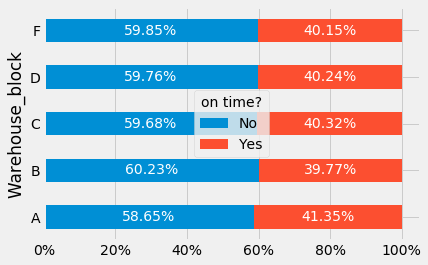

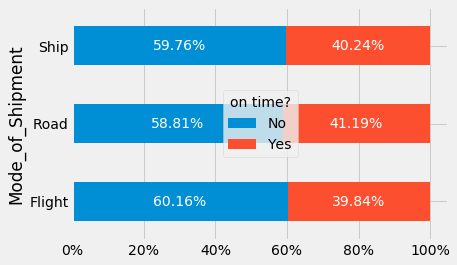

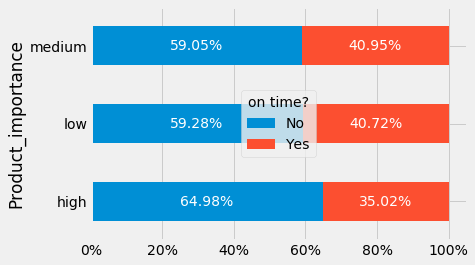

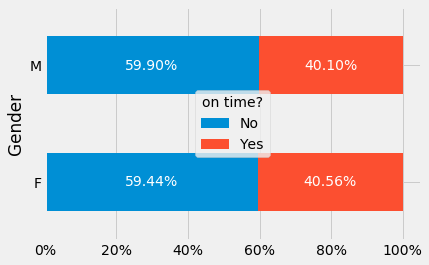

In [19]:
for col in cat_col:
    rasio_plot(data = df, col=col)

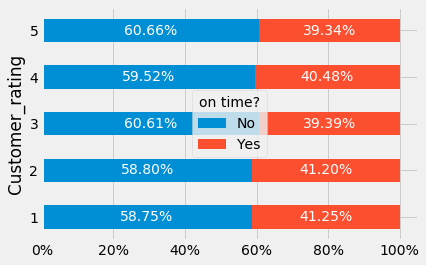

In [20]:
rasio_plot(data = df, col = 'Customer_rating')

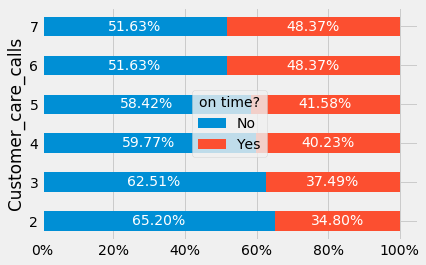

In [21]:
rasio_plot(data = df, col = 'Customer_care_calls')

Conclusion:

1. Hanya variabel "Product_importance" yang memiliki p-value chi2 contingency di bawah 0.05
2. Terlihat komposisi variabel target di masing-masing kategori terlihat stabil di 40% tepat waktu

Saran untuk data processing:
1. Feature engineering untuk menambah kompleksitas

# Misc

Assumption:
* Cost mode of shipment dari termahal sampai termurah: flight, road, ship
* Higher weight -> higher delivery cost
* Higher discount offered -> lower revenue (coba dibuat feature baru 'gross_revenue')
* Higher prior_purchases -> more active consumer

In [22]:
df['discount'] = df['Cost_of_the_Product'] * (df['Discount_offered'] / 100)
df['profit'] = df['Cost_of_the_Product'] * 0.1 - df['discount'] # assuming profit margin 10%
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,On_time?,discount,profit
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,No,77.88,-60.18
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,No,127.44,-105.84
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,No,87.84,-69.54
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,No,17.60,0.00
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,No,84.64,-66.24


In [23]:
def rasio_ontime(data, col):
    df = data.copy()
    g = df.groupby('On_time?')[col].value_counts(normalize=True).unstack(col).plot(kind='barh', stacked=True)
    g.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    #g.set_ylabel('Partner Dependants Group')
    g.legend(loc='best', title = col)

    for p in g.patches:
        g.annotate(format(p.get_width(), '.2%'),
                   xy = (p.get_x() + p.get_width() / 2,
                         p.get_y() + p.get_height() / 2,),
                   ha = 'center',
                   va = 'center',
                   color = 'white'
                  )
    plt.show()

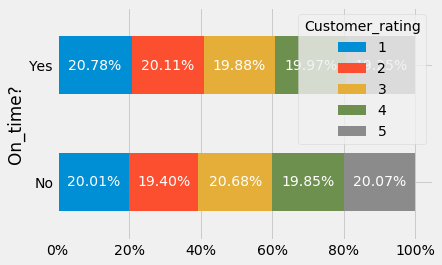

In [24]:
rasio_ontime(data = df, col = 'Customer_rating')

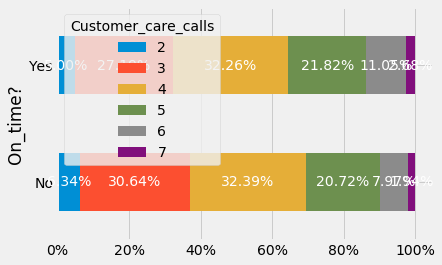

In [25]:
rasio_ontime(data = df, col = 'Customer_care_calls')

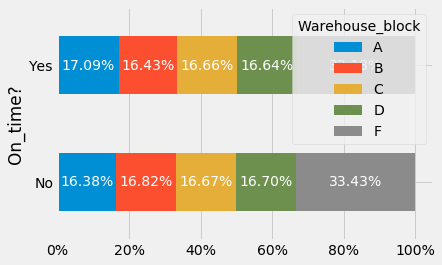

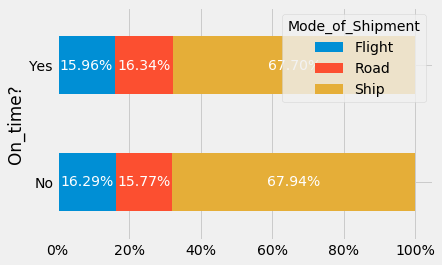

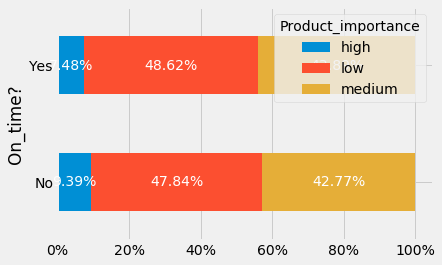

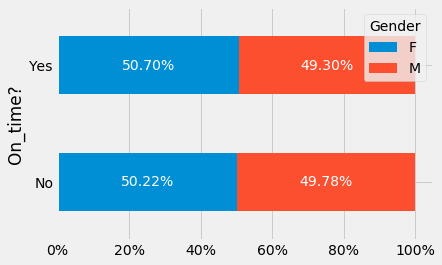

In [26]:
for col in cat_col:
    rasio_ontime(data = df, col = col)

In [29]:
temp = df.describe().T
temp['IQR'] = temp['75%'] - temp['25%']
temp['max_out'] = temp['75%'] + temp['IQR'] * 1.5
temp['min_out'] = temp['25%'] - temp['IQR'] * 1.5
temp

,count,mean,std,min,25%,50%,75%,max,IQR,max_out,min_out
ID,10999.0,5500.000000,3175.282140,1.00,2750.50,5500.00,8249.50,10999.0,5499.00,16498.000,-5498.000
Customer_care_calls,10999.0,4.054459,1.141490,2.00,3.00,4.00,5.00,7.0,2.00,8.000,0.000
Customer_rating,10999.0,2.990545,1.413603,1.00,2.00,3.00,4.00,5.0,2.00,7.000,-1.000
Cost_of_the_Product,10999.0,210.196836,48.063272,96.00,169.00,214.00,251.00,310.0,82.00,374.000,46.000
Prior_purchases,10999.0,3.567597,1.522860,2.00,3.00,3.00,4.00,10.0,1.00,5.500,1.500
Discount_offered,10999.0,13.373216,16.205527,1.00,4.00,7.00,10.00,65.0,6.00,19.000,-5.000
Weight_in_gms,10999.0,3634.016729,1635.377251,1001.00,1839.50,4149.00,5050.00,7846.0,3210.50,9865.750,-2976.250
Reached.on.Time_Y.N,10999.0,0.596691,0.490584,0.00,0.00,1.00,1.00,1.0,1.00,2.500,-1.500
discount,10999.0,27.032878,32.999805,0.96,7.68,14.42,25.21,185.9,17.53,51.505,-18.615
profit,10999.0,-6.013194,33.106271,-157.30,0.00,5.76,12.70,27.9,12.70,31.750,-19.050


In [31]:
df[df['Discount_offered'] > 19].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2209.0,1568.917610,901.685871,1.00,790.00,1589.00,2338.00,3134.00
Customer_care_calls,2209.0,3.755093,0.989186,2.00,3.00,4.00,4.00,7.00
Customer_rating,2209.0,2.986872,1.428016,1.00,2.00,3.00,4.00,5.00
Cost_of_the_Product,2209.0,196.099593,45.360104,96.00,158.00,192.00,233.00,296.00
Prior_purchases,2209.0,3.310095,1.532348,2.00,2.00,3.00,4.00,10.00
Discount_offered,2209.0,42.811679,13.182108,20.00,32.00,43.00,54.00,65.00
Weight_in_gms,2209.0,2371.054776,933.418967,1001.00,1557.00,2232.00,3150.00,7846.00
Reached.on.Time_Y.N,2209.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00
discount,2209.0,84.045342,33.180109,21.12,58.50,80.00,105.30,185.90
profit,2209.0,-64.435383,30.653389,-157.30,-84.28,-61.09,-39.78,-11.52


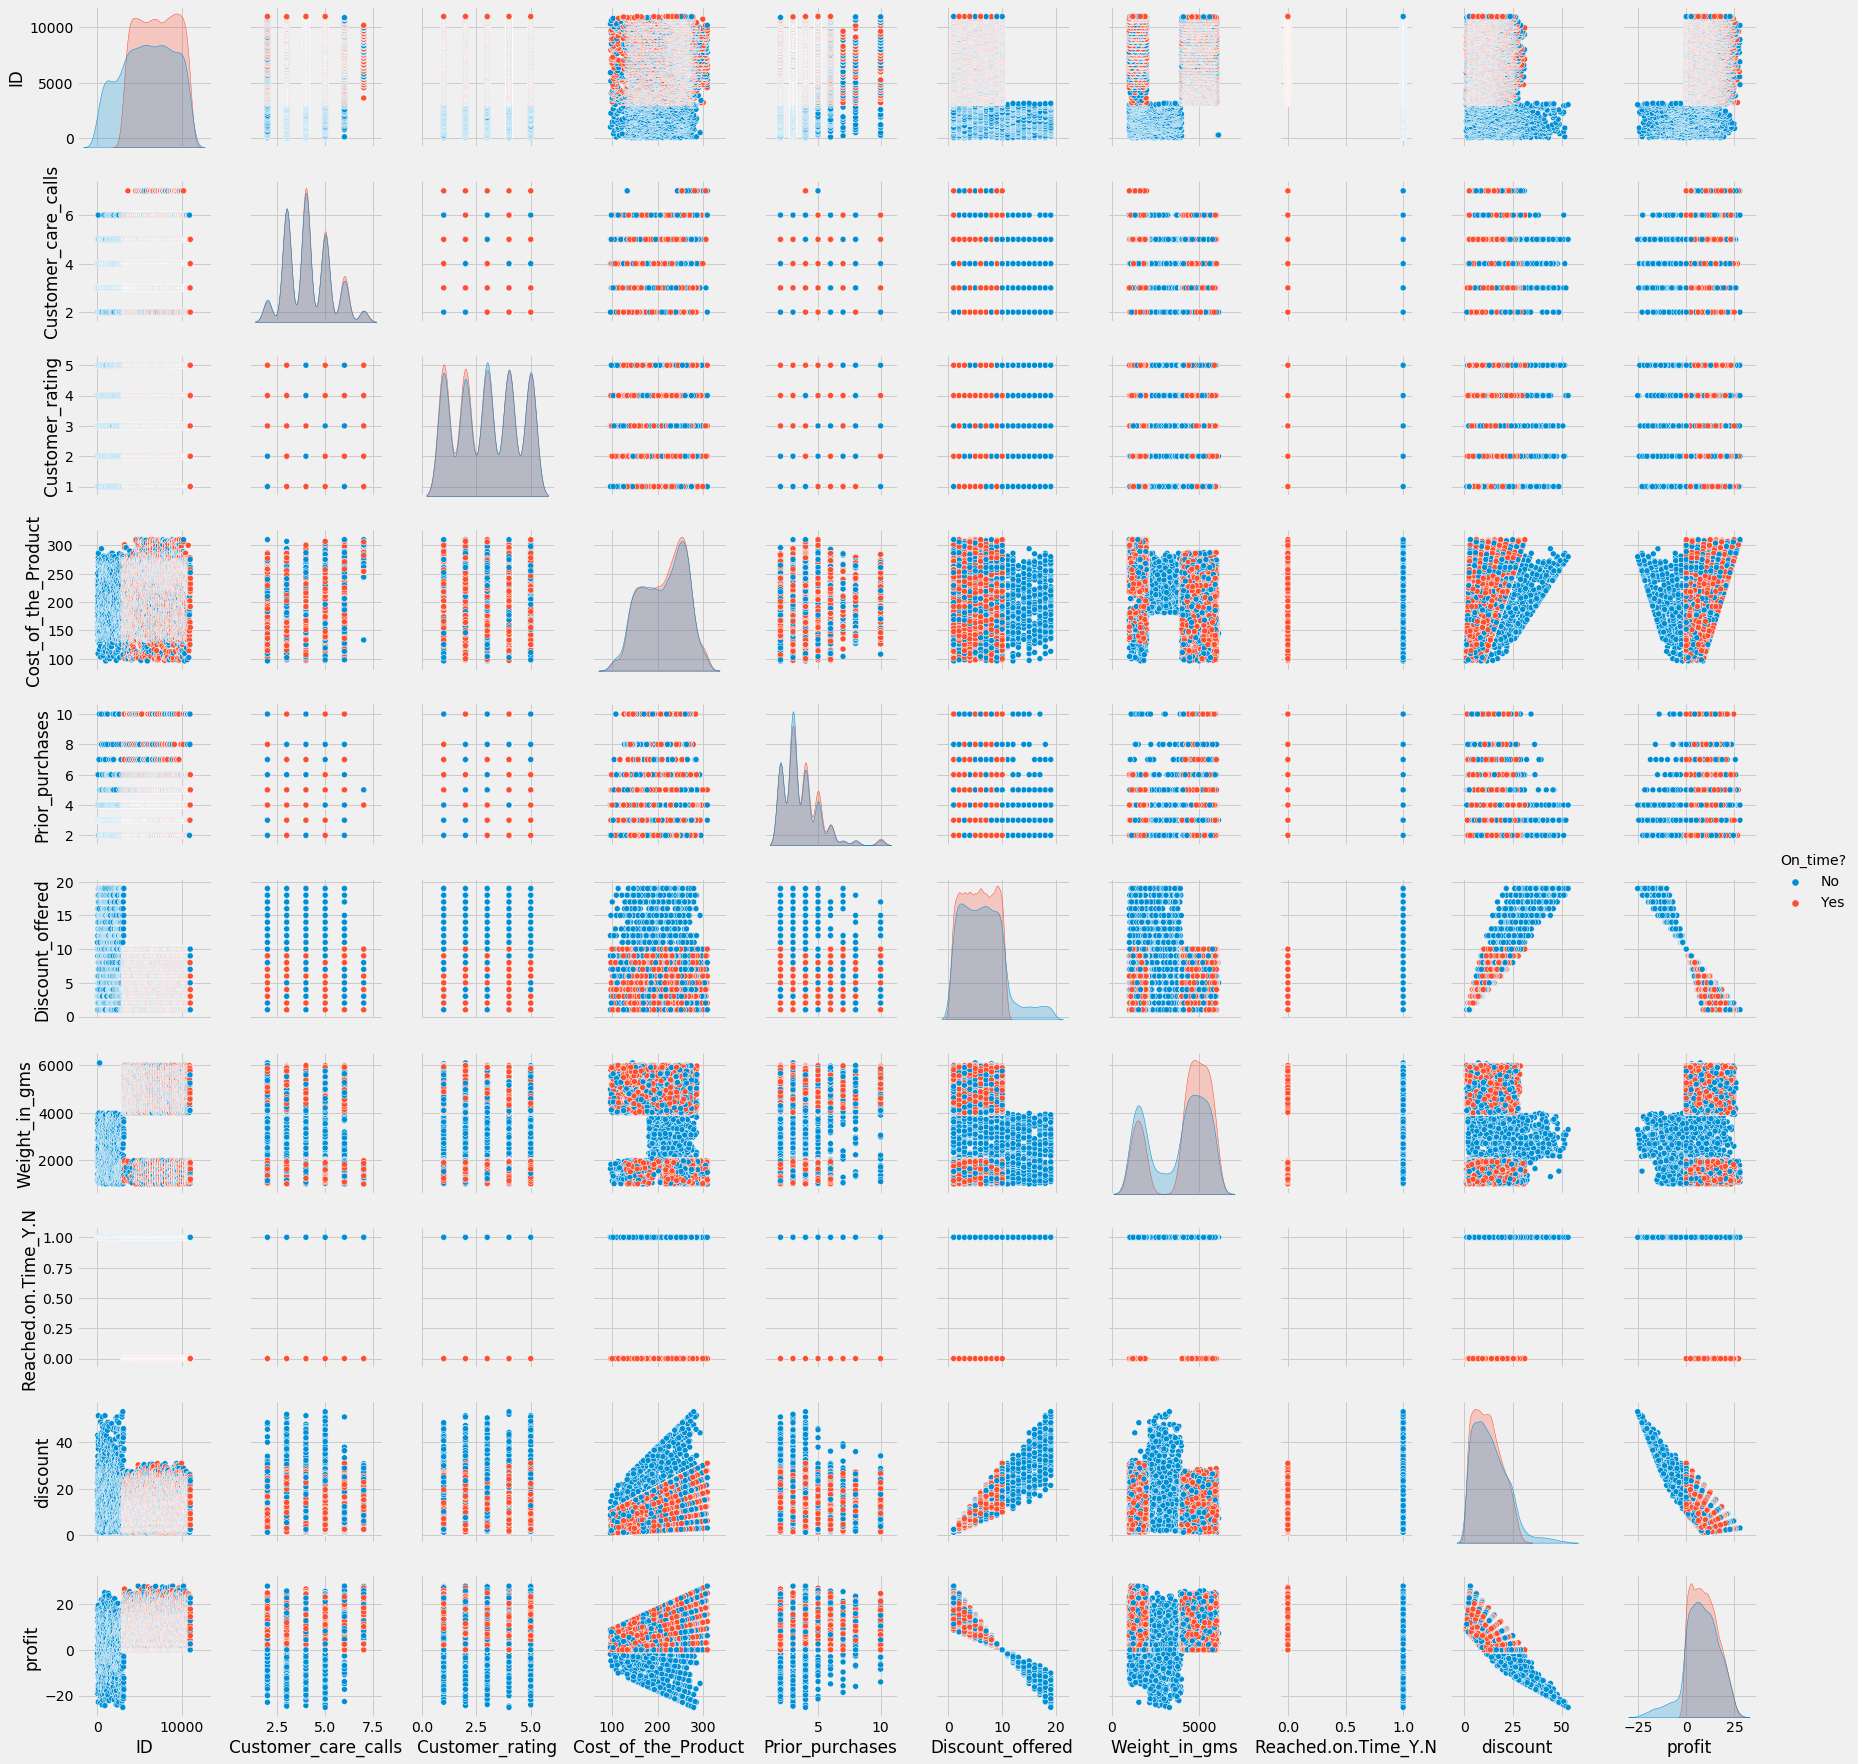

In [37]:
sns.pairplot(df[df['Discount_offered'] <= 19], hue = 'On_time?', diag_kind = 'kde')